# Achievement 6.5 - Unsupervised Machine Learning
Chloe deBeus
## In this notebook
### 1. Importing libraries and data
### 2. The elbow technique
### 3. k-means clustering

## Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

%matplotlib inline

In [3]:
mainPath = r'C:\Users\chloe\Documents\Documents\Documents\Career Foundry\Data Immersion'

In [4]:
#let's pull in the dataset from the previous achievement since it will require similar needs
df = pd.read_csv(os.path.join(mainPath, 'Achievement 6', '6.4 Cleaned Sourcing Data_deBeus.csv'))

In [5]:
df.shape

(3194, 15)

In [6]:
df.head()

,Unnamed: 0,State,County,N alcohol driving deaths,R alcohol driving deaths,R housing problems,R cost burden,R overcrowding,R inadequate facilities,R drive alone,N broadband access,R broadband access,categorical alcohol deaths R,categorical housing R,categorical broadband access R
0,0,Alabama,Alabama,7,26.5625,12.576985,9.79691,1.880878,0.956768,79.815668,7914,81.689511,2.0,1.0,1.0
1,1,Alabama,Autauga,18,32.1000,14.400000,12.60000,1.100000,1.600000,86.400000,18679,85.500000,2.0,2.0,2.0
2,2,Alabama,Baldwin,57,32.2000,12.200000,10.60000,1.300000,0.600000,81.400000,76602,87.900000,2.0,1.0,2.0
3,3,Alabama,Barbour,12,37.5000,16.200000,13.50000,3.900000,0.600000,83.100000,5872,64.600000,2.0,2.0,1.0
4,4,Alabama,Bibb,6,21.4000,11.300000,8.00000,1.200000,2.200000,87.000000,5284,74.600000,1.0,1.0,1.0


In [7]:
df.columns

Index(['Unnamed: 0', 'State', 'County', 'N alcohol driving deaths',
       'R alcohol driving deaths', 'R housing problems', 'R cost burden',
       'R overcrowding', 'R inadequate facilities', 'R drive alone',
       'N broadband access', 'R broadband access',
       'categorical alcohol deaths R', 'categorical housing R',
       'categorical broadband access R'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0                          int64
State                              object
County                             object
N alcohol driving deaths            int64
R alcohol driving deaths          float64
R housing problems                float64
R cost burden                     float64
R overcrowding                    float64
R inadequate facilities           float64
R drive alone                     float64
N broadband access                  int64
R broadband access                float64
categorical alcohol deaths R      float64
categorical housing R             float64
categorical broadband access R    float64
dtype: object

In [9]:
#we need to drop the columns that are not floats
dropColumns = ['Unnamed: 0', 'State', 'County']
df.drop(dropColumns, axis=1, inplace=True)

In [10]:
df.columns

Index(['N alcohol driving deaths', 'R alcohol driving deaths',
       'R housing problems', 'R cost burden', 'R overcrowding',
       'R inadequate facilities', 'R drive alone', 'N broadband access',
       'R broadband access', 'categorical alcohol deaths R',
       'categorical housing R', 'categorical broadband access R'],
      dtype='object')

In [11]:
#we also need to replace the NA because kmeans cannot function with any NA.
#we know from the previous exercise, it is best to use the median
median = df.median()
df.fillna(median, inplace = True)

## Step two: the elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\chloe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chloe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chloe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chloe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-35970807646560.54,
 -16797559650247.787,
 -8051213732743.012,
 -4636056811519.606,
 -3147460830433.241,
 -1861557484122.1174,
 -1274836125782.2725,
 -884794491765.4606,
 -696032603169.7946]

The output defines ten possible clusters... one cluster, two clustes, three, etc. The number shows the variation for each cluster option.

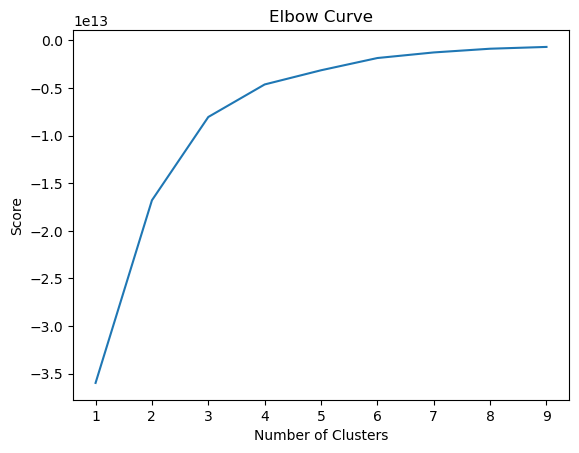

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

How interesting! this reminds me of a turf graph! What number/choices reach the highest audience without making it redundant? In this case, it looks like 3 or 4

In [15]:
kmeans = KMeans(n_clusters=3)

In [16]:
kmeans.fit(df)

C:\Users\chloe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [17]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\chloe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
df.head()

,N alcohol driving deaths,R alcohol driving deaths,R housing problems,R cost burden,R overcrowding,R inadequate facilities,R drive alone,N broadband access,R broadband access,categorical alcohol deaths R,categorical housing R,categorical broadband access R,clusters
0,7,26.5625,12.576985,9.79691,1.880878,0.956768,79.815668,7914,81.689511,2.0,1.0,1.0,0
1,18,32.1000,14.400000,12.60000,1.100000,1.600000,86.400000,18679,85.500000,2.0,2.0,2.0,0
2,57,32.2000,12.200000,10.60000,1.300000,0.600000,81.400000,76602,87.900000,2.0,1.0,2.0,0
3,12,37.5000,16.200000,13.50000,3.900000,0.600000,83.100000,5872,64.600000,2.0,2.0,1.0,0
4,6,21.4000,11.300000,8.00000,1.200000,2.200000,87.000000,5284,74.600000,1.0,1.0,1.0,0


In [19]:
df['clusters'].value_counts()

0    3069
1     121
2       4
Name: clusters, dtype: int64

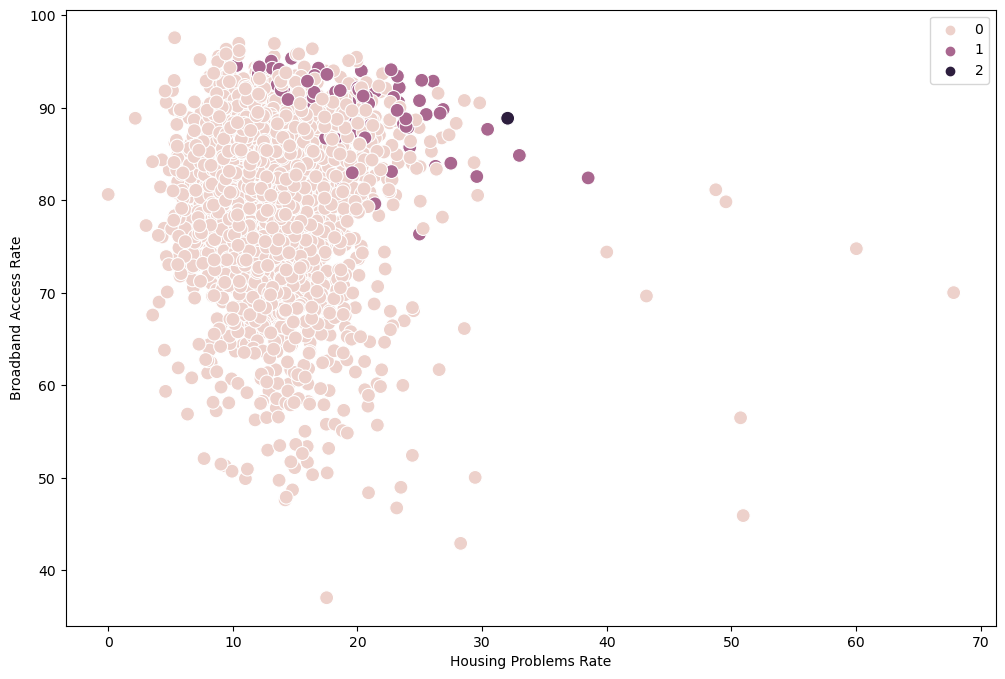

In [20]:
#let's plot these clusters
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['R housing problems'], y=df['R broadband access'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Housing Problems Rate')
plt.ylabel('Broadband Access Rate') 
plt.show()

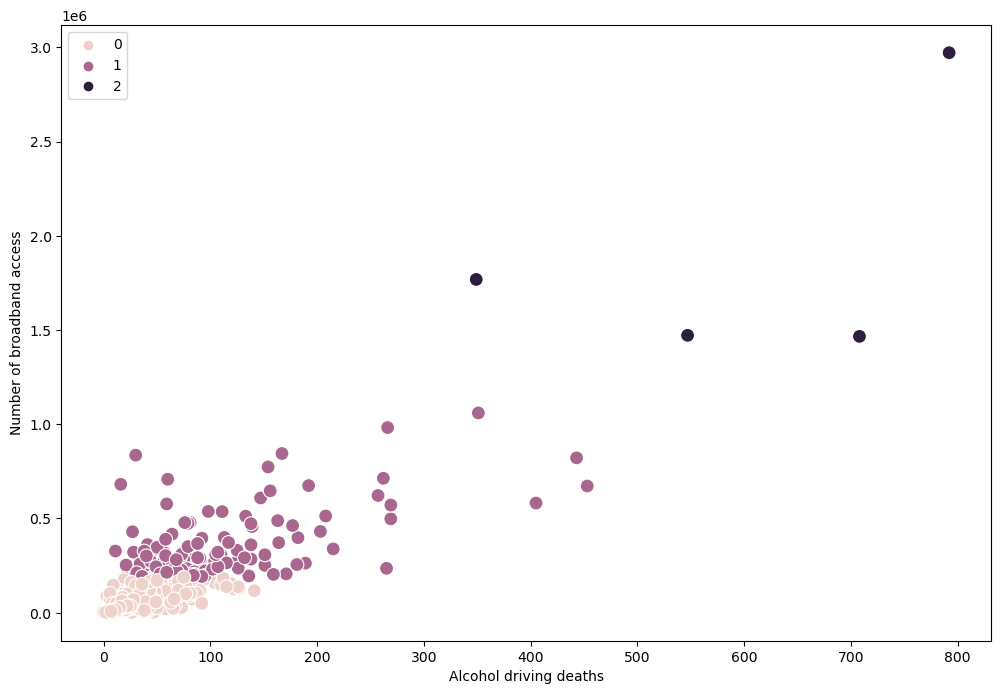

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['N alcohol driving deaths'], y=df['N broadband access'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Alcohol driving deaths') 
plt.ylabel('Number of broadband access') 
plt.show()

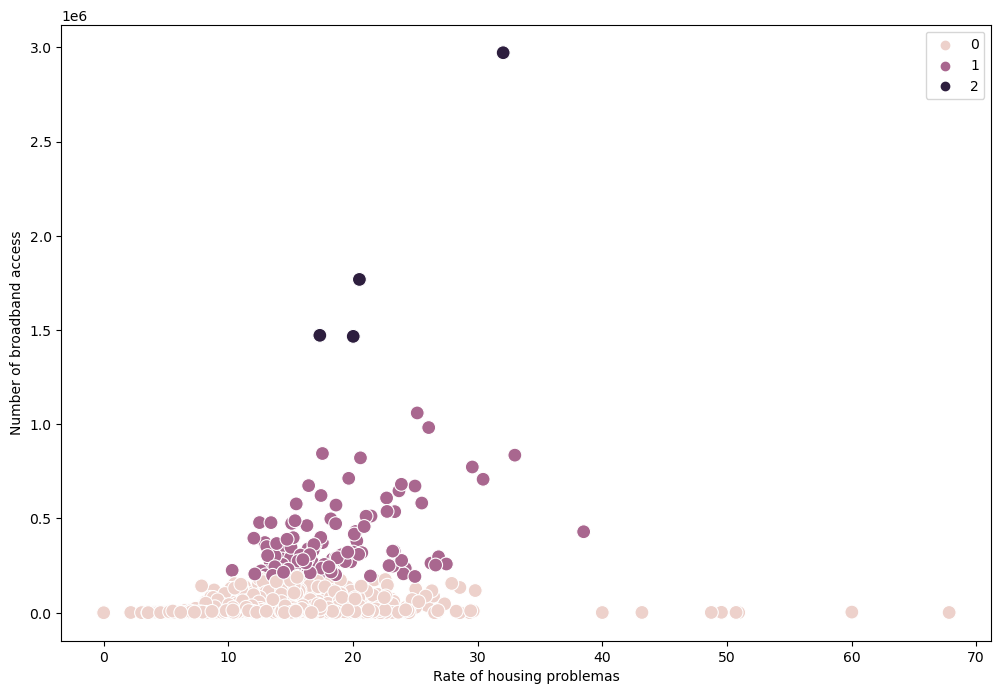

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['R housing problems'], y=df['N broadband access'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rate of housing problemas') 
plt.ylabel('Number of broadband access') 
plt.show()

In [23]:
#now let's show the colors of the clusters across the rest of the data
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'magenta'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
df.groupby('cluster').agg({'R housing problems':['mean', 'median'],
                           'N broadband access':['mean', 'median'], 
                         'R broadband access':['mean', 'median'],                     
                          'N alcohol driving deaths':['mean', 'median']})

R housing problems            N broadband access             \
                      mean     median               mean     median   
cluster                                                               
black            22.481486  20.267735       1.919449e+06  1620119.0   
magenta          18.273473  16.866154       3.613542e+05   296802.0   
pink             12.825156  12.500000       1.854034e+04     7477.0   

        R broadband access            N alcohol driving deaths         
                      mean     median                     mean median  
cluster                                                                
black            88.490754  88.648141                599.00000  627.5  
magenta          89.372477  90.005694                111.38843   91.0  
pink             80.201983  81.543357                 11.16520    7.0

1. The cluster with the most people - pink - has the lowest number of broadband acess and the lowest rate. There may be some discrepancies in the data of extremely low numbers or missing values. Or other discrepancies that they may be living in areas that the collection of this is tainted and biased or simply difficult to collect.
2. Or these may include rural areas which make up a large majority of people.
3. Those with large housing problems but major access to broadband are likely urban areas that have lots of social services available for things such as broadband access...
4. I need to look into the background of this data and the geography of these clusters! We'll have to take the new variables and put them on a map by combining the two dataframes/datasets since we took location out of the dataframe.

In [25]:
df.to_csv(os.path.join(mainPath, mainPath, 'Achievement 6', '6.5 Cleaned Sourcing Data_deBeus.csv'))